In [28]:
## Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

In [84]:
## Load data
pd.options.display.max_columns = None

#pt_one = pd.read_csv("datasets/NBA_Player_Stats.csv")
#pt_two = pd.read_csv("datasets/NBA_Player_Stats_2.csv") Same dataset but with MVP column
#nba_df = pd.concat([pt_one, pt_two])

nba_df = pd.read_csv("datasets/NBA_Player_Stats.csv")
backup_df = pd.read_csv("datasets/all_seasons.csv")

nba_df.head(20)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998
5,4,Cory Alexander,PG,24,DEN,23,19,34.7,4.8,11.1,0.435,2.0,4.9,0.411,2.8,6.2,0.455,0.525,2.4,2.8,0.846,0.4,3.9,4.3,6.0,2.0,0.3,2.8,2.0,14.0,1997-1998
6,5,Ray Allen*,SG,22,MIL,82,82,40.1,6.9,16.0,0.428,1.6,4.5,0.364,5.2,11.5,0.453,0.479,4.2,4.8,0.875,1.5,3.4,4.9,4.3,1.4,0.1,3.2,3.0,19.5,1997-1998
7,6,Derek Anderson,SF,23,CLE,66,13,27.9,3.6,8.9,0.408,0.3,1.3,0.202,3.4,7.6,0.442,0.422,4.2,4.8,0.873,0.8,2.0,2.8,3.4,1.3,0.2,1.9,2.1,11.7,1997-1998
8,7,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,0.444,0.0,0.1,0.000,0.7,1.5,0.474,0.444,0.3,0.8,0.390,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1997-1998
9,8,Kenny Anderson,PG,27,TOT,61,56,30.5,4.4,11.0,0.398,0.9,2.6,0.356,3.5,8.4,0.411,0.440,2.5,3.2,0.789,0.6,2.2,2.8,5.7,1.4,0.0,2.3,2.2,12.2,1997-1998


In [86]:
## Data Preprocessing
nba_df.shape

# Clean field names below

## Replace whitespace in column names and remove erroneous characters
nba_df.columns = nba_df.columns.str.replace('[ ]', "_", regex = True)
nba_df.columns = nba_df.columns.str.replace('[%]', "_pct", regex = True)

## Make column names all lowercase
nba_df.columns = nba_df.columns.str.lower()

## Review how many nulls in data
nulls = nba_df.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)

nulls


3p_pct     2198
ft_pct      749
2p_pct      154
fg_pct       88
efg_pct      88
dtype: int64

In [87]:
## Look for dupes
nba_df[nba_df.duplicated()]

,rk,player,pos,age,tm,g,gs,mp,fg,fga,fg_pct,3p,3pa,3p_pct,2p,2pa,2p_pct,efg_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,year


In [88]:
## Data Analysis Start
nba_df.info()

nba_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rk       14573 non-null  int64  
 1   player   14573 non-null  object 
 2   pos      14573 non-null  object 
 3   age      14573 non-null  int64  
 4   tm       14573 non-null  object 
 5   g        14573 non-null  int64  
 6   gs       14573 non-null  int64  
 7   mp       14573 non-null  float64
 8   fg       14573 non-null  float64
 9   fga      14573 non-null  float64
 10  fg_pct   14485 non-null  float64
 11  3p       14573 non-null  float64
 12  3pa      14573 non-null  float64
 13  3p_pct   12375 non-null  float64
 14  2p       14573 non-null  float64
 15  2pa      14573 non-null  float64
 16  2p_pct   14419 non-null  float64
 17  efg_pct  14485 non-null  float64
 18  ft       14573 non-null  float64
 19  fta      14573 non-null  float64
 20  ft_pct   13824 non-null  float64
 21  orb      145

,rk,age,g,gs,mp,fg,fga,fg_pct,3p,3pa,3p_pct,2p,2pa,2p_pct,efg_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,12375.000000,14573.000000,14573.000000,14419.000000,14485.000000,14573.000000,14573.000000,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,0.284298,2.341529,4.895409,0.464823,0.473485,1.401283,1.872422,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,0.160299,1.859938,3.698337,0.113274,0.109297,1.350654,1.700262,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,0.222000,1.000000,2.100000,0.423000,0.438000,0.500000,0.700000,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,0.326000,1.800000,3.900000,0.470000,0.483000,1.000000,1.400000,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,0.375000,3.300000,6.800000,0.514000,0.524000,1.900000,2.500000,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,1.000000,12.100000,23.400000,1.000000,1.500000,10.300000,13.100000,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


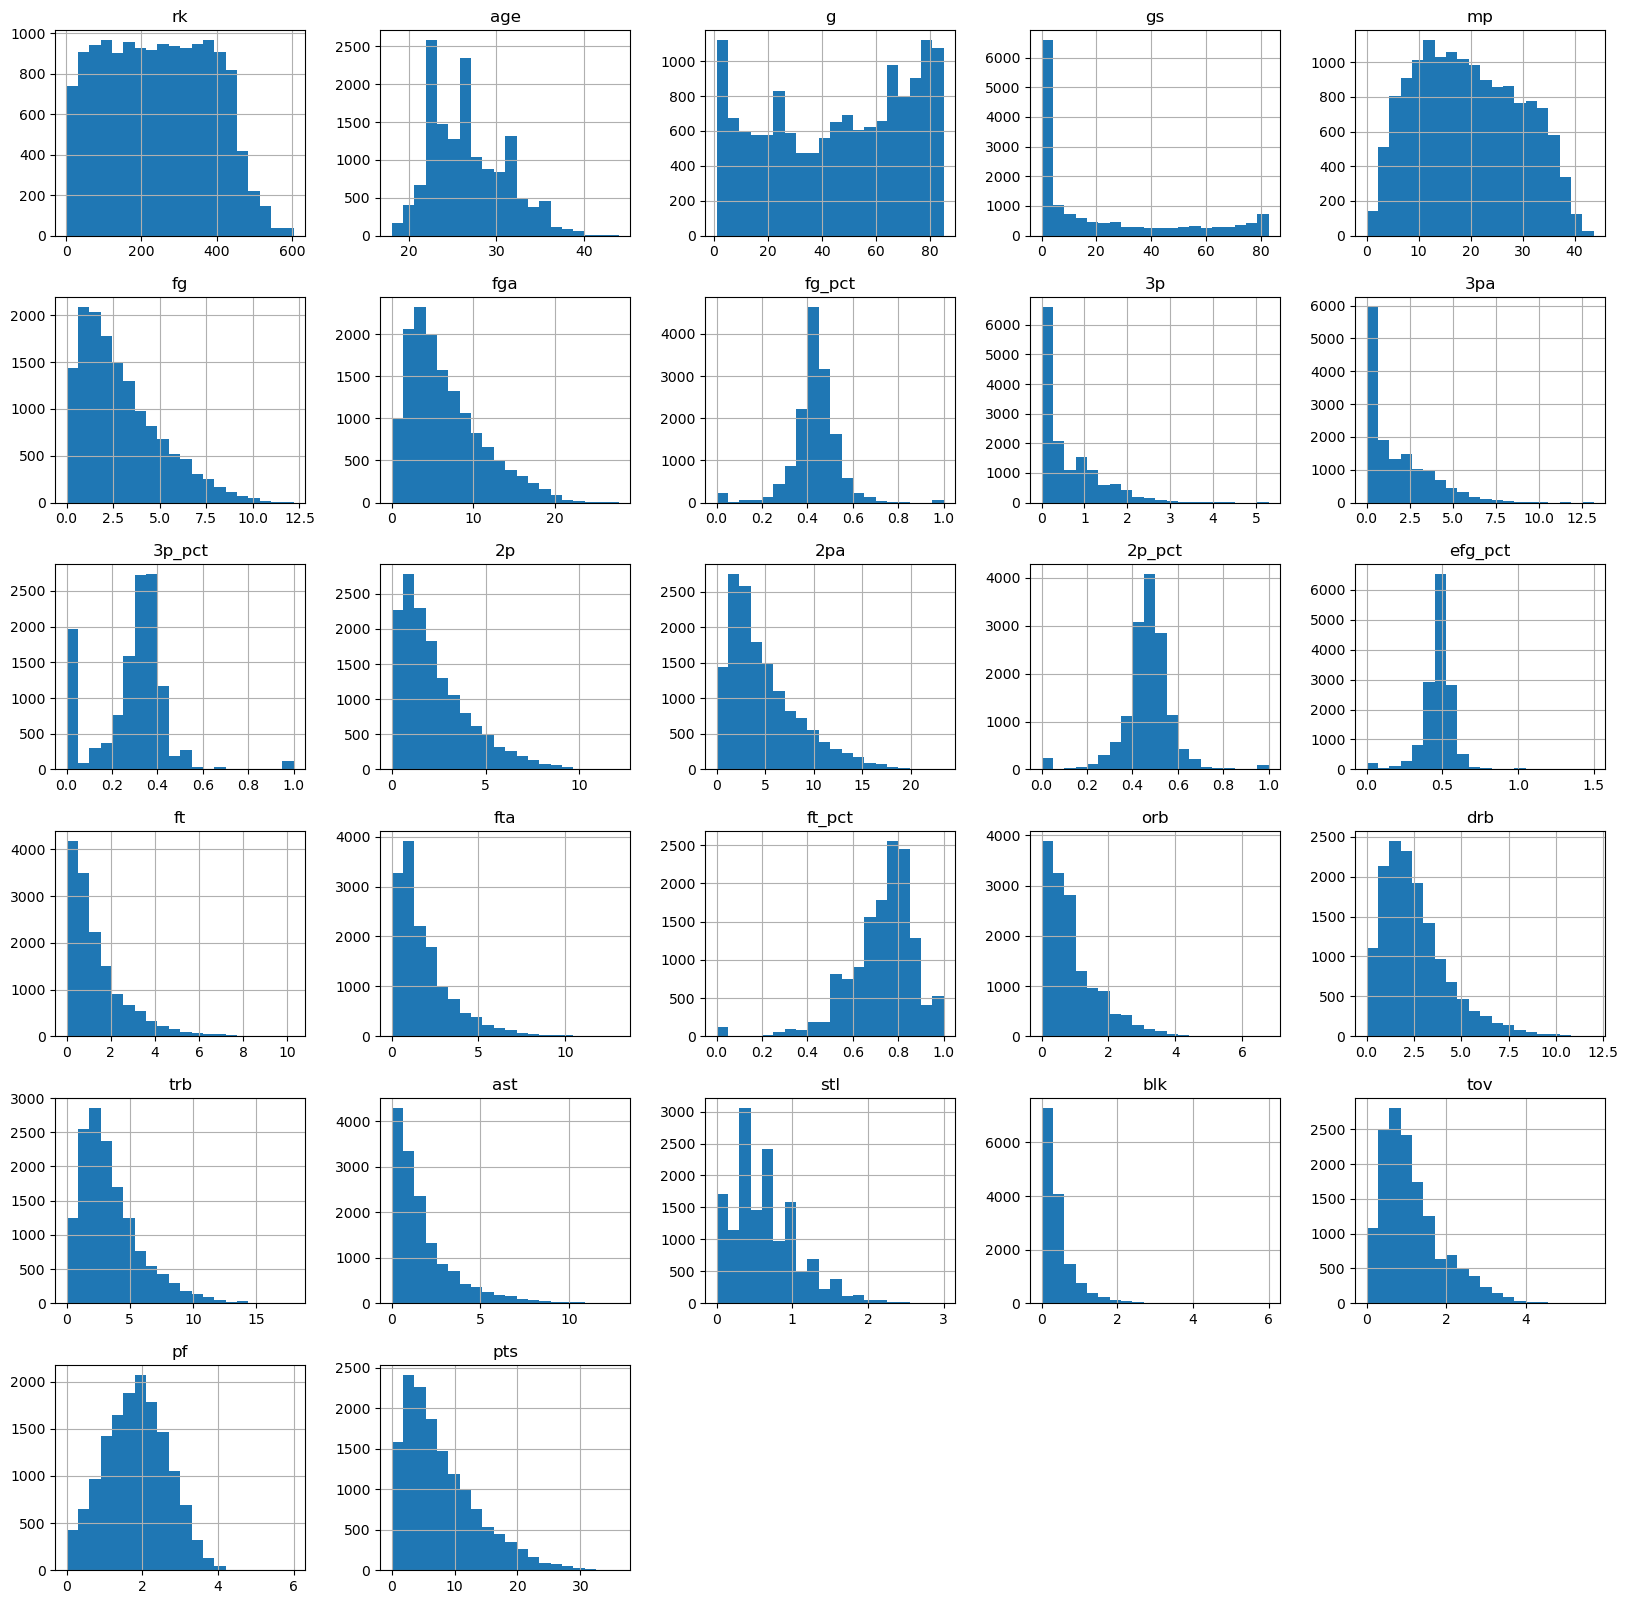

In [89]:
## View all numeric variables 

nba_df.hist(figsize=(20,20),bins = 20)
plt.show()

Based on what we see distributed, the following are metrics to look at:
- age
- gs (games started) vs g (games) vs mp (minutes played
- game stats (pts, reb, orb, drb, trb, ast, stl, blk, tov, pf)
- other stats (fg, fga, fg_pct, 2p, 2pa, 2p_pct, 3p, 3pa, 3p_pct, efg_pct)

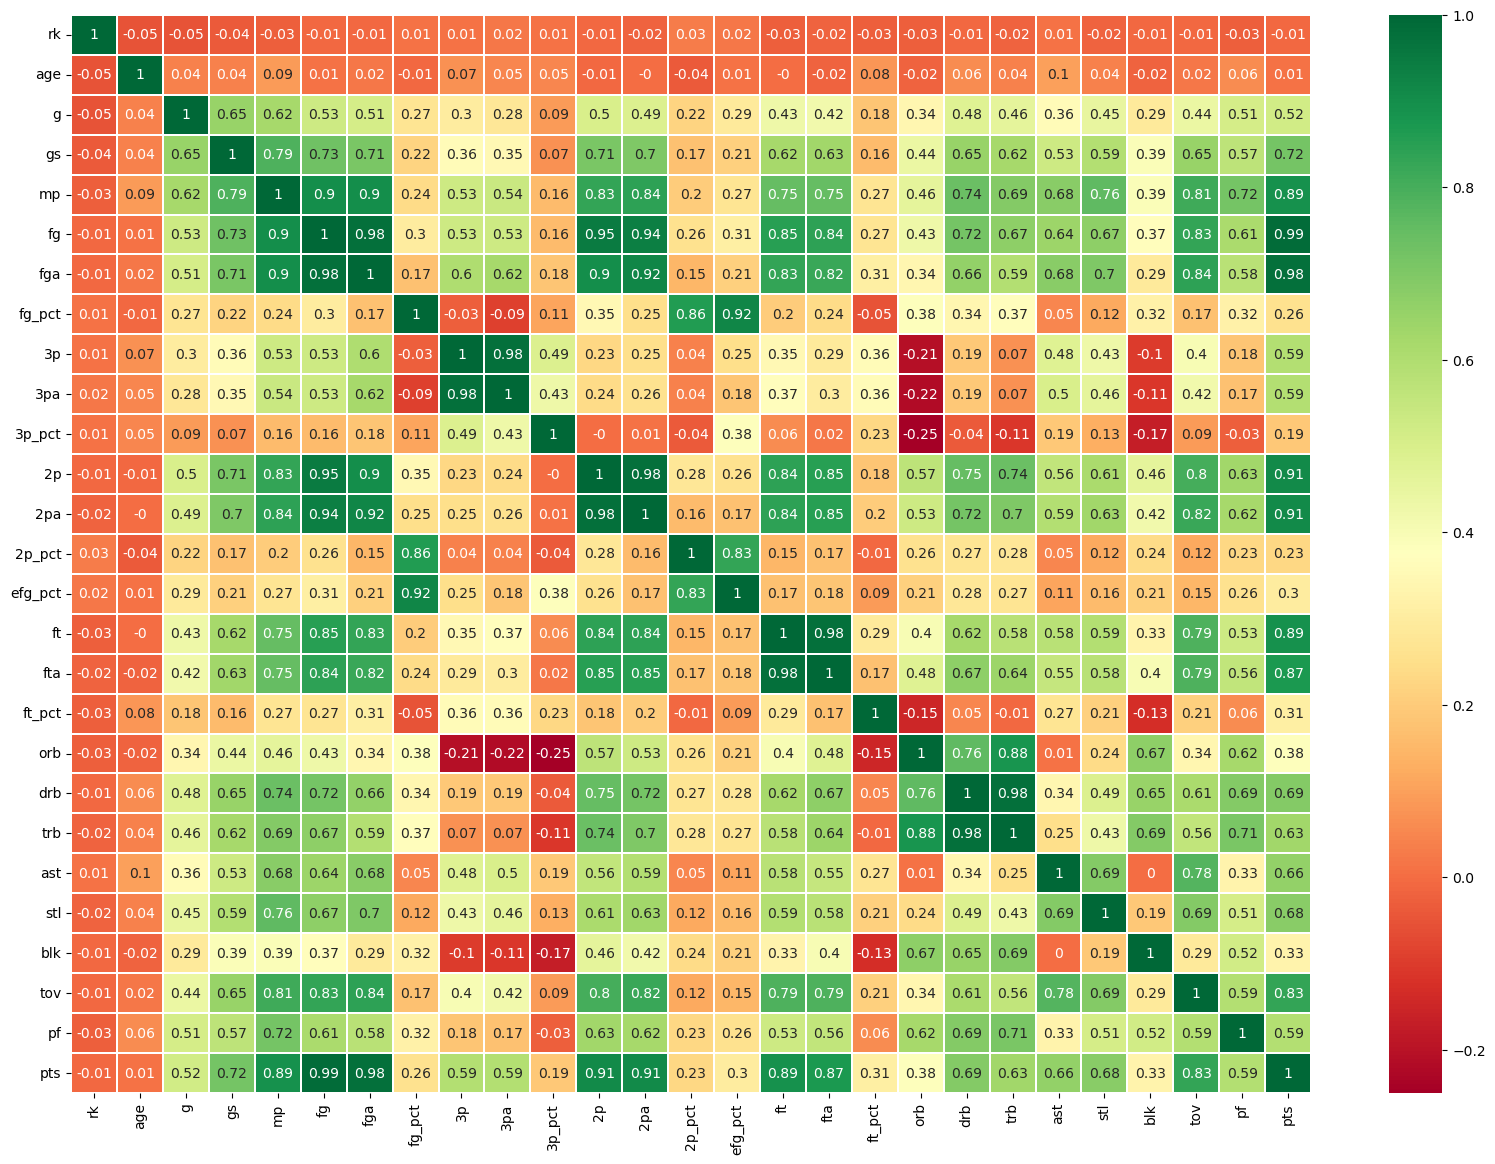

In [117]:
## Create a correlation matrix against all numeric fields

matrix_df = nba_df.select_dtypes(include=['number'])

corr_matrix = matrix_df.corr().round(2)
f, ax = plt.subplots(figsize=(20, 14))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.1)
plt.show()

Looking at the correlations above:
- I see mostly correlations I expected.
- Something I want to explore would be with categorical values against the numeric
    - Something I'd be interested in is team tenure and player performance. The idea is to see if there is relevance for being on certain teams against others.


In [ ]:
df_cat = nba_df.select_dtypes(include=['object'])